In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import r2_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import ConfusionMatrixDisplay

In [69]:
df = pd.read_csv("/content/pd_speech_features.csv")
df.head()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


In [70]:
len(df)

756

In [7]:
df.describe()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
count,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,...,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000
mean,125.500000,0.515873,0.746284,0.700414,0.489058,323.972222,322.678571,0.006360,0.000383,0.002324,...,26.237251,22.840337,18.587888,13.872018,12.218953,12.375335,14.799230,14.751559,31.481110,0.746032
std,72.793721,0.500079,0.169294,0.069718,0.137442,99.219059,99.402499,0.001826,0.000728,0.002628,...,42.220693,32.626464,25.537464,20.046029,17.783642,16.341665,15.722502,14.432979,34.230991,0.435568
min,0.000000,0.000000,0.041551,0.543500,0.154300,2.000000,1.000000,0.002107,0.000011,0.000210,...,1.509800,1.531700,1.582900,1.747200,1.789500,1.628700,1.861700,1.955900,2.364000,0.000000
25%,62.750000,0.000000,0.762833,0.647053,0.386537,251.000000,250.000000,0.005003,0.000049,0.000970,...,2.408675,3.452800,3.354825,3.077450,2.937025,3.114375,3.665925,3.741275,3.948750,0.000000
50%,125.500000,1.000000,0.809655,0.700525,0.484355,317.000000,316.000000,0.006048,0.000077,0.001495,...,5.586300,7.062750,6.077400,4.770850,4.300450,4.741450,6.725700,7.334250,10.637250,1.000000
75%,188.250000,1.000000,0.834315,0.754985,0.586515,384.250000,383.250000,0.007528,0.000171,0.002520,...,28.958075,29.830850,21.944050,13.188000,10.876150,12.201325,21.922050,22.495175,61.125325,1.000000
max,251.000000,1.000000,0.907660,0.852640,0.871230,907.000000,905.000000,0.012966,0.003483,0.027750,...,239.788800,203.311300,121.542900,102.207000,85.571700,73.532200,62.007300,57.544300,156.423700,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Columns: 755 entries, id to class
dtypes: float64(749), int64(6)
memory usage: 4.4 MB


In [9]:
df.columns

Index(['id', 'gender', 'PPE', 'DFA', 'RPDE', 'numPulses', 'numPeriodsPulses',
       'meanPeriodPulses', 'stdDevPeriodPulses', 'locPctJitter',
       ...
       'tqwt_kurtosisValue_dec_28', 'tqwt_kurtosisValue_dec_29',
       'tqwt_kurtosisValue_dec_30', 'tqwt_kurtosisValue_dec_31',
       'tqwt_kurtosisValue_dec_32', 'tqwt_kurtosisValue_dec_33',
       'tqwt_kurtosisValue_dec_34', 'tqwt_kurtosisValue_dec_35',
       'tqwt_kurtosisValue_dec_36', 'class'],
      dtype='object', length=755)

In [10]:
df.isna().sum()

id                           0
gender                       0
PPE                          0
DFA                          0
RPDE                         0
                            ..
tqwt_kurtosisValue_dec_33    0
tqwt_kurtosisValue_dec_34    0
tqwt_kurtosisValue_dec_35    0
tqwt_kurtosisValue_dec_36    0
class                        0
Length: 755, dtype: int64

In [11]:
df.head()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


<ipython-input-12-f62f84fea9b5>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["gender"], color = "Green");


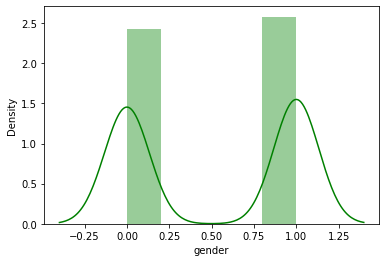

In [12]:
sns.distplot(df["gender"], color = "Green");

In [13]:
pd.crosstab(df["class"], df["gender"])

gender,0,1
class,,
0,123,69
1,243,321


In [14]:
condition = ["Does not have Parkinson's","Does have Parkinson's"]

have_or_not = df["class"].value_counts().tolist()
values = [have_or_not[0], have_or_not[1]]

fig = px.pie(values = df["class"].value_counts(), names = condition, width = 800, height = 400, color_discrete_sequence = ["skyblue", "violet"], title = "Percentage whether patient has Parkinson's or not")
fig.show()

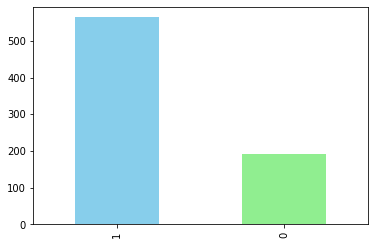

In [15]:
df["class"].value_counts().plot(kind = "bar", color = ["skyblue", "lightgreen"]);

<ipython-input-16-8c427acaf190>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




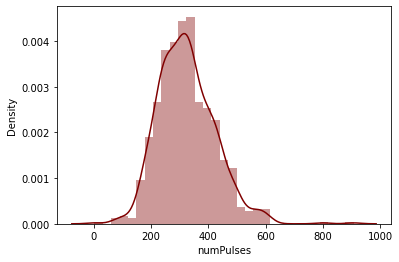

In [16]:
sns.distplot(df["numPulses"], color = "maroon");

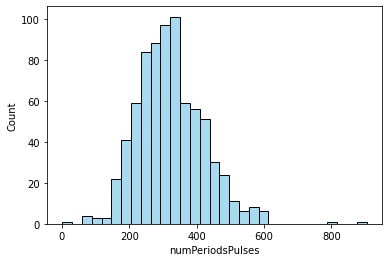

In [17]:
sns.histplot(df["numPeriodsPulses"], color = "skyblue");

<ipython-input-18-82096340b212>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




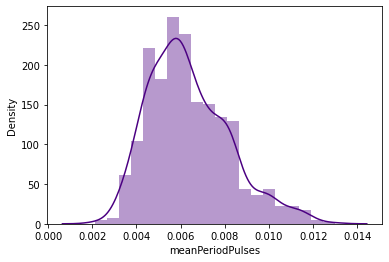

In [18]:
sns.distplot(df["meanPeriodPulses"], color = "indigo");

<Axes: ylabel='count'>

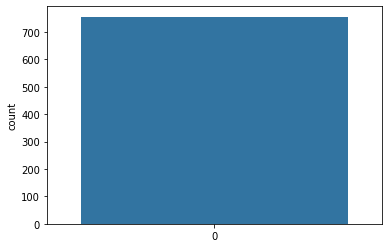

In [19]:
sns.countplot(df['numPulses'])

<Axes: xlabel='tqwt_kurtosisValue_dec_35', ylabel='Count'>

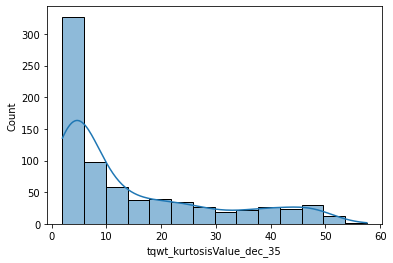

In [20]:
sns.histplot(df['tqwt_kurtosisValue_dec_35'],kde=True)

<Axes: xlabel='numPulses', ylabel='Density'>

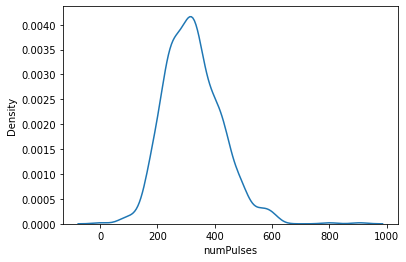

In [21]:
sns.kdeplot(df['numPulses'])

In [22]:
x = df.iloc[:, 0:754].values
y = df.iloc[:, -1].values 

In [23]:
x

array([[  0.     ,   1.     ,   0.85247, ...,   2.6202 ,   3.0004 ,
         18.9405 ],
       [  0.     ,   1.     ,   0.76686, ...,   6.5245 ,   6.3431 ,
         45.178  ],
       [  0.     ,   1.     ,   0.85083, ...,   2.9199 ,   3.1495 ,
          4.7666 ],
       ...,
       [251.     ,   0.     ,   0.88389, ...,   3.5377 ,   3.3545 ,
          5.0424 ],
       [251.     ,   0.     ,   0.83782, ...,   2.6801 ,   2.8332 ,
          3.7131 ],
       [251.     ,   0.     ,   0.81304, ...,   4.0116 ,   2.6217 ,
          3.1527 ]])

In [24]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [25]:
from sklearn.preprocessing import StandardScaler
x= StandardScaler().fit_transform(x)

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [27]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

In [28]:
x_train.shape

(604, 754)

In [29]:
x_test.shape

(152, 754)

In [30]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 6)
x_train_new = pca.fit_transform(x_train)
x_test_new = pca.transform(x_test)    

In [31]:
x_train_new.shape

(604, 6)

In [32]:
x_test_new.shape

(152, 6)

##Logistic Regression before PCA

In [33]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=42)
classifier.fit(x_train,y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(random_state=42)

##Logistic Regression after PCA

In [34]:
classifier2 = LogisticRegression(random_state=42)
classifier2.fit(x_train_new,y_train)

LogisticRegression(random_state=42)

In [35]:
y_pred = classifier.predict(x_test) 
y_pred_new = classifier2.predict(x_test_new) 

Accuracy score

In [36]:
from sklearn.metrics import accuracy_score

In [37]:
accuracy_score(y_test, y_pred)*100

86.8421052631579

In [38]:
accuracy_score(y_test, y_pred_new)*100

86.8421052631579

In [46]:
import itertools

from sklearn import datasets, metrics
from sklearn.metrics import confusion_matrix

from sklearn.neighbors import KernelDensity
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.ensemble import GradientBoostingClassifier
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn import preprocessing

from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification

from sklearn.decomposition import FastICA
from sklearn.metrics import accuracy_score, log_loss
import sklearn.metrics as metrics
from sklearn.metrics import classification_report

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

In [47]:
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 756 rows and 755 columns


In [48]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize = (5,5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('01')
    plt.xlabel('01')

In [49]:
def plot_roc_curve(y_test, y_pred):
    # calculate the fpr and tpr for all thresholds of the classification
    fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
    roc_auc = metrics.auc(fpr, tpr)
    plt.figure(figsize=(8, 6))

    # method I: plt
    plt.title('Receiver Operating Characteristic', fontsize=14)
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
    plt.legend(loc = 'lower right', fontsize=11)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([-0.005, 1])
    plt.ylim([0, 1.005])
    plt.ylabel('True Positive Rate', fontsize=12)
    plt.xlabel('False Positive Rate', fontsize=12)
    plt.grid(color='r', linestyle='--', linewidth=0.2)
    plt.show()

--------------------------------------------------------
||====================================================||
|| Train Accuracy GaussianNB Model :=> 100.00%  ||
||====================================================||
--------------------------------------------------------
||====================================================||
|| Test Accuracy GaussianNB Model :=> 80.26%  ||
||====================================================||
--------------------------------------------------------
--------------------------------------------------------
||====================================================||
|| Binary Cross Entropy - GaussianNB Model :=> 7.11  ||
||====================================================||
--------------------------------------------------------
--------------------------------------------------------
||====================================================||
|| Cross Entropy Accuracy :=> 75.53% +- 2.29%  ||
||===================================================

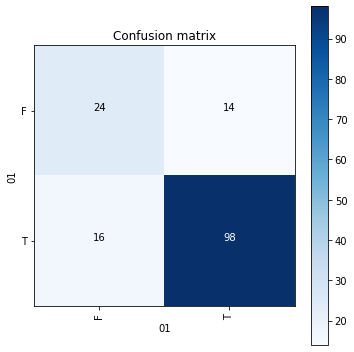

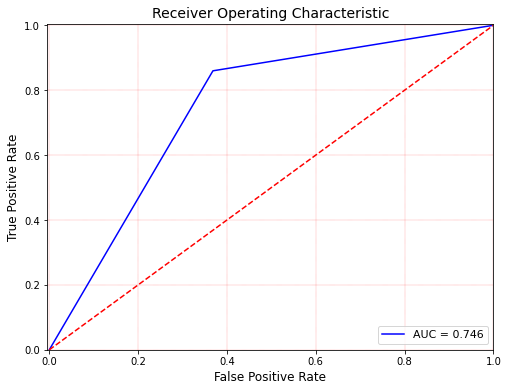

In [52]:
def my_GaussianNB(x_train, y_train, X_test, y_test, x, y):
    clf = GaussianNB()

    # fitting the classifier
    clf.fit(x_train, y_train)

    y_pred = clf.predict(x_test)

    y_pred = clf.predict(x_test)
    y_pred_train = clf.predict(x_train)
    print("--------------------------------------------------------")
    print("||====================================================||")
    print("|| Train Accuracy GaussianNB Model :=> %.2f%%" % (accuracy_score(y_train, y_train)*100), " ||")
    print("||====================================================||")
    print("--------------------------------------------------------")
    print("||====================================================||")
    print("|| Test Accuracy GaussianNB Model :=> %.2f%%" % (accuracy_score(y_test, y_pred)*100), " ||")
    print("||====================================================||")
    print("--------------------------------------------------------")
    print("--------------------------------------------------------")
    print("||====================================================||")
    print("|| Binary Cross Entropy - GaussianNB Model :=> {:.2f}".format(log_loss(y_test, y_pred)), " ||")
    print("||====================================================||")
    print("--------------------------------------------------------")
    acc = cross_val_score(clf, x, y, cv=5, scoring='accuracy')
    print("--------------------------------------------------------")
    print("||====================================================||")
    print("|| Cross Entropy Accuracy :=> %.2f%% +- %.2f%%" %(np.mean(acc)*100,np.std(acc)*100), " ||")
    print("||====================================================||")
    print("--------------------------------------------------------")

    confusion_mtx = confusion_matrix(y_test, y_pred)
    print(classification_report(y_test, y_pred, target_names="FT"))
    plot_confusion_matrix(confusion_mtx, "FT")

    plot_roc_curve(y_test, y_pred)

my_GaussianNB(x_train, y_train, x_test, y_test, x, y)


--------------------------------------------------------
||====================================================||
|| Train Accuracy GaussianNB Model :=> 100.00%  ||
||====================================================||
--------------------------------------------------------
||====================================================||
|| Test Accuracy GaussianNB Model :=> 75.00%  ||
||====================================================||
--------------------------------------------------------
--------------------------------------------------------
||====================================================||
|| Binary Cross Entropy - GaussianNB Model :=> 9.01  ||
||====================================================||
--------------------------------------------------------
--------------------------------------------------------
||====================================================||
|| Cross Entropy Accuracy :=> 75.53% +- 2.29%  ||
||===================================================

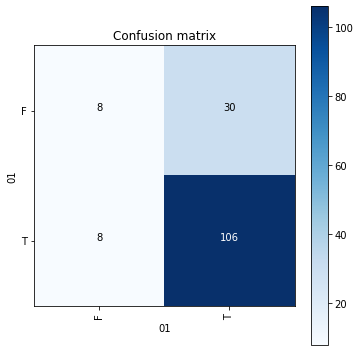

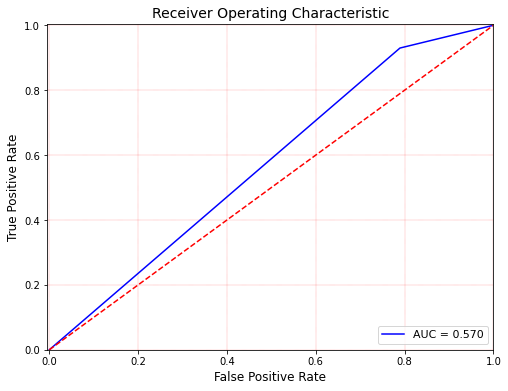

In [54]:
def my_GaussianNB(x_train_new, y_train, x_test_new, y_test, x, y):
    clf = GaussianNB()

    # fitting the classifier
    clf.fit(x_train_new, y_train)

    y_pred = clf.predict(x_test_new)

    y_pred = clf.predict(x_test_new)
    y_pred_train = clf.predict(x_train_new)
    print("--------------------------------------------------------")
    print("||====================================================||")
    print("|| Train Accuracy GaussianNB Model :=> %.2f%%" % (accuracy_score(y_train, y_train)*100), " ||")
    print("||====================================================||")
    print("--------------------------------------------------------")
    print("||====================================================||")
    print("|| Test Accuracy GaussianNB Model :=> %.2f%%" % (accuracy_score(y_test, y_pred)*100), " ||")
    print("||====================================================||")
    print("--------------------------------------------------------")
    print("--------------------------------------------------------")
    print("||====================================================||")
    print("|| Binary Cross Entropy - GaussianNB Model :=> {:.2f}".format(log_loss(y_test, y_pred)), " ||")
    print("||====================================================||")
    print("--------------------------------------------------------")
    acc = cross_val_score(clf, x, y, cv=5, scoring='accuracy')
    print("--------------------------------------------------------")
    print("||====================================================||")
    print("|| Cross Entropy Accuracy :=> %.2f%% +- %.2f%%" %(np.mean(acc)*100,np.std(acc)*100), " ||")
    print("||====================================================||")
    print("--------------------------------------------------------")

    confusion_mtx = confusion_matrix(y_test, y_pred)
    print(classification_report(y_test, y_pred, target_names="FT"))
    plot_confusion_matrix(confusion_mtx, "FT")

    plot_roc_curve(y_test, y_pred)

my_GaussianNB(x_train_new, y_train, x_test_new, y_test, x, y)

--------------------------------------------------------
||====================================================||
|| Train Accuracy LogisticRegression Model :=> 100.00%  ||
||====================================================||
--------------------------------------------------------
||====================================================||
|| Test Accuracy LogisticRegression Model :=> 86.84%  ||
||====================================================||
--------------------------------------------------------
--------------------------------------------------------
||====================================================||
|| Binary Cross Entropy - LogisticRegression Model :=> 4.74  ||
||====================================================||
--------------------------------------------------------
--------------------------------------------------------
||====================================================||
|| Cross Entropy Accuracy :=> 78.32% +- 5.89%  ||
||===========================

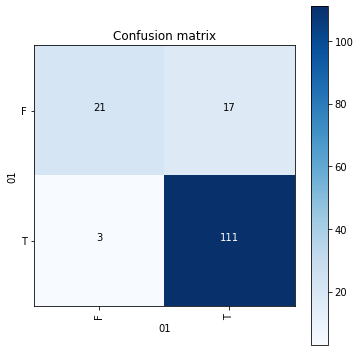

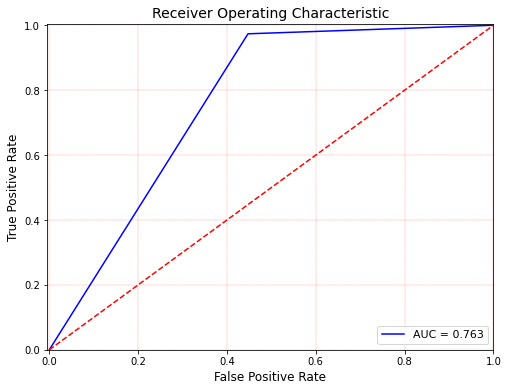

In [55]:
from sklearn.linear_model import LogisticRegression

def my_LogisticRegression(x_train_new_new, y_train, x_test_new, y_test, X, y):
    clf = LogisticRegression(random_state=42, max_iter=1000).fit(x_train_new, y_train)
    # fitting the classifier
    clf.fit(x_train_new, y_train)

    y_pred = clf.predict(x_test_new)
    y_pred_train = clf.predict(x_train_new)

    print("--------------------------------------------------------")
    print("||====================================================||")
    print("|| Train Accuracy LogisticRegression Model :=> %.2f%%" % (accuracy_score(y_train, y_train)*100), " ||")
    print("||====================================================||")
    print("--------------------------------------------------------")
    print("||====================================================||")
    print("|| Test Accuracy LogisticRegression Model :=> %.2f%%" % (accuracy_score(y_test, y_pred)*100), " ||")
    print("||====================================================||")
    print("--------------------------------------------------------")
    print("--------------------------------------------------------")
    print("||====================================================||")
    print("|| Binary Cross Entropy - LogisticRegression Model :=> {:.2f}".format(log_loss(y_test, y_pred)), " ||")
    print("||====================================================||")
    print("--------------------------------------------------------")

    acc = cross_val_score(clf, x, y, cv=5, scoring='accuracy')
    print("--------------------------------------------------------")
    print("||====================================================||")
    print("|| Cross Entropy Accuracy :=> %.2f%% +- %.2f%%" %(np.mean(acc)*100,np.std(acc)*100), " ||")
    print("||====================================================||")
    print("--------------------------------------------------------")

    confusion_mtx = confusion_matrix(y_test, y_pred)
    print(classification_report(y_test, y_pred, target_names="FT"))
    plot_confusion_matrix(confusion_mtx, "FT")

    plot_roc_curve(y_test, y_pred)


my_LogisticRegression(x_train_new, y_train, x_test_new, y_test, x, y)


--------------------------------------------------------
||====================================================||
|| Train Accuracy KNN Model :=> 100.00%  ||
||====================================================||
--------------------------------------------------------
||====================================================||
|| Test Accuracy KNN Model :=> 84.87%  ||
||====================================================||
--------------------------------------------------------
--------------------------------------------------------
||====================================================||
|| Binary Cross Entropy - KNN Model :=> 5.45  ||
||====================================================||
--------------------------------------------------------
--------------------------------------------------------
||====================================================||
|| Cross Entropy Accuracy :=> 79.63% +- 6.42%  ||
||====================================================||
-----------------

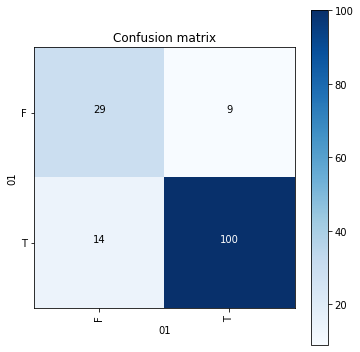

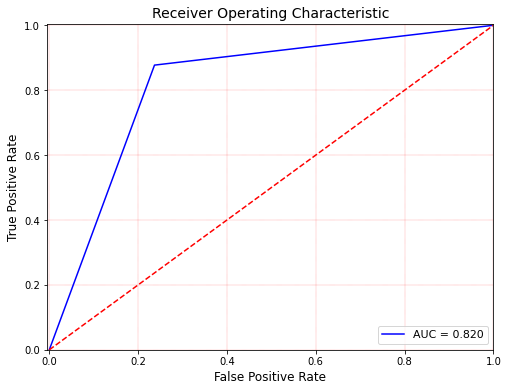

In [57]:
from sklearn.neighbors import KNeighborsClassifier

def my_KNN(x_train_new, y_train, x_test_new, y_test, x, y):
    clf = KNeighborsClassifier(n_neighbors=1)
    clf.fit(x_train_new, y_train)

    y_pred = clf.predict(x_test_new)
    y_pred_train = clf.predict(x_train_new)

    print("--------------------------------------------------------")
    print("||====================================================||")
    print("|| Train Accuracy KNN Model :=> %.2f%%" % (accuracy_score(y_train, y_train)*100), " ||")
    print("||====================================================||")
    print("--------------------------------------------------------")
    print("||====================================================||")
    print("|| Test Accuracy KNN Model :=> %.2f%%" % (accuracy_score(y_test, y_pred)*100), " ||")
    print("||====================================================||")
    print("--------------------------------------------------------")
    print("--------------------------------------------------------")
    print("||====================================================||")
    print("|| Binary Cross Entropy - KNN Model :=> {:.2f}".format(log_loss(y_test, y_pred)), " ||")
    print("||====================================================||")
    print("--------------------------------------------------------")

    acc = cross_val_score(clf, x, y, cv=10, scoring='accuracy')
    print("--------------------------------------------------------")
    print("||====================================================||")
    print("|| Cross Entropy Accuracy :=> %.2f%% +- %.2f%%" %(np.mean(acc)*100,np.std(acc)*100), " ||")
    print("||====================================================||")
    print("--------------------------------------------------------")

    confusion_mtx = confusion_matrix(y_test, y_pred)
    print(classification_report(y_test, y_pred, target_names="FT"))
    plot_confusion_matrix(confusion_mtx, "FT")

    plot_roc_curve(y_test, y_pred)

my_KNN(x_train_new, y_train, x_test_new, y_test, x, y)

              precision    recall  f1-score   support

           0       0.61      0.61      0.61        38
           1       0.87      0.87      0.87       114

    accuracy                           0.80       152
   macro avg       0.74      0.74      0.74       152
weighted avg       0.80      0.80      0.80       152

-------------------------------------------------------------------------------------------------------------
||=========================================================================================================||
|| Train Accuracy [Optimizer:adam - AF:relu - Max Iter:30000 - Early Stop:True - Hidden Layer Size:300]:=> 100.00 % ||
||=========================================================================================================||
-------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------
||==

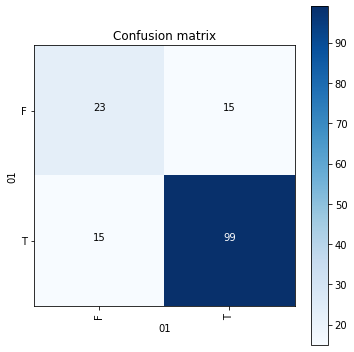

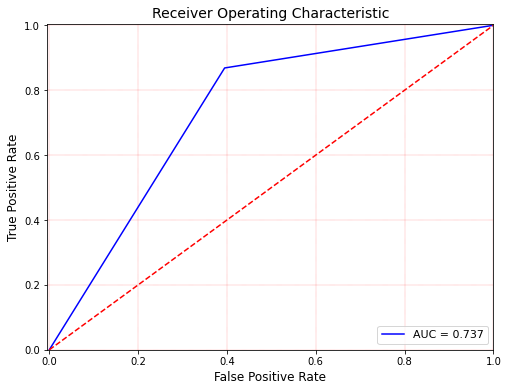

In [58]:
def my_MLP(x_train_new, y_train, x_test_new, y_test, x, y):
    hidden_layer_size=300
    max_iteration=30000
    activation_function='relu'
    optimizer='adam'
    early_stopping = True
    ###################################
    mlp_adam = MLPClassifier(hidden_layer_sizes=(hidden_layer_size, 30), max_iter=max_iteration, 
                            activation=activation_function, solver=optimizer, 
                            learning_rate='adaptive', early_stopping=early_stopping)
    mlp_adam.fit(x_train_new, y_train)

    y_pred = mlp_adam.predict(x_test_new)

    print("======================================================")
    print(classification_report(y_test, y_pred))
    print("======================================================")

    y_pred_train = mlp_adam.predict(x_train_new)
    print("-------------------------------------------------------------------------------------------------------------")
    print("||=========================================================================================================||")
    print("|| Train Accuracy [Optimizer:{} - AF:{} - Max Iter:{} - Early Stop:{} - Hidden Layer Size:{}]:=> {:.2f} %".format(optimizer, 
                                                                                activation_function, 
                                                                                max_iteration,
                                                                                early_stopping,
                                                                                hidden_layer_size,
                                                                                accuracy_score(y_train, y_train)*100
                                                                                )
    , "||")
    print("||=========================================================================================================||")
    print("-------------------------------------------------------------------------------------------------------------")

    print("-------------------------------------------------------------------------------------------------------------")
    print("||=========================================================================================================||")
    print("|| Test Accuracy [Optimizer:{} - AF:{} - Max Iter:{} - Early Stop:{} - Hidden Layer Size:{}]:=> {:.2f} %".format(optimizer, 
                                                                                activation_function, 
                                                                                max_iteration,
                                                                                early_stopping,
                                                                                hidden_layer_size,
                                                                                accuracy_score(y_test, y_pred)*100
                                                                                )
    , "||")
    print("||=========================================================================================================||")
    print("-------------------------------------------------------------------------------------------------------------")

    print("--------------------------------------------------------")
    print("||====================================================||")
    print("|| Binary Cross Entropy - MLP Model :=> {:.2f}".format(log_loss(y_test, y_pred)), " ||")
    print("||====================================================||")
    print("--------------------------------------------------------")

    # acc = cross_val_score(mlp_adam, X, y, cv=5, scoring='accuracy')
    # print("--------------------------------------------------------")
    # print("||====================================================||")
    # print("|| Cross Entropy Accuracy :=> %.2f%% +- %.2f%%" %(np.mean(acc)*100,np.std(acc)*100), " ||")
    # print("||====================================================||")
    # print("--------------------------------------------------------")

    confusion_mtx = confusion_matrix(y_test, y_pred)
    print(classification_report(y_test, y_pred, target_names="FT"))
    plot_confusion_matrix(confusion_mtx, "FT")

    # method I: plt
    plot_roc_curve(y_test, y_pred)

my_MLP(x_train_new, y_train, x_test_new, y_test, x, y)

||============================================================================||
||----------------------------------------------------------------------------||
|| Accuracy of SVM with linear Kernel, One-vs-Rest:=> 74.34 %                ||
||----------------------------------------------------------------------------||
|| Accuracy of SVM with linear Kernel, One-vs-One:=> 74.34 %                 ||
|| ---------------------------------------------------------------------------||
|| Accuracy of SVM with RBF Kernel, One-vs-Rest:=> 78.29 %                   ||
||----------------------------------------------------------------------------||
|| Accuracy of SVM with polynomial (degree 3) Kernel, One-vs-Rest:=> 83.55 % ||
||============================================================================||
||----------------------------------------------------------------------------||


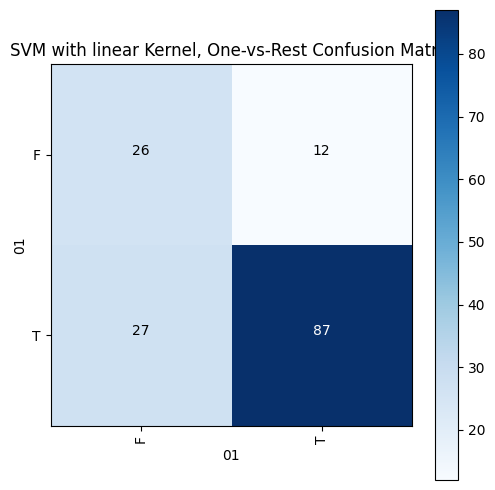

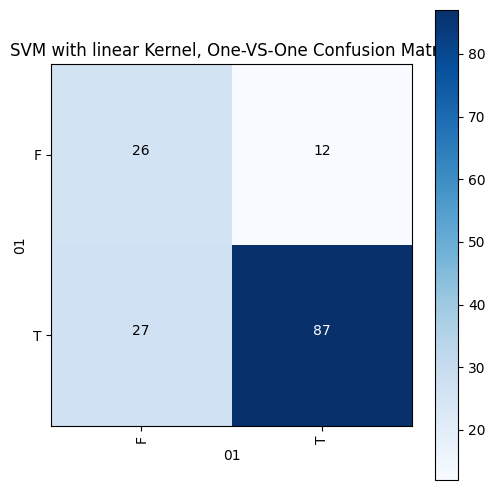

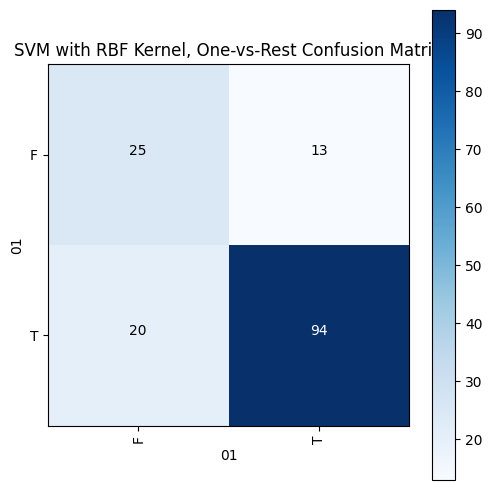

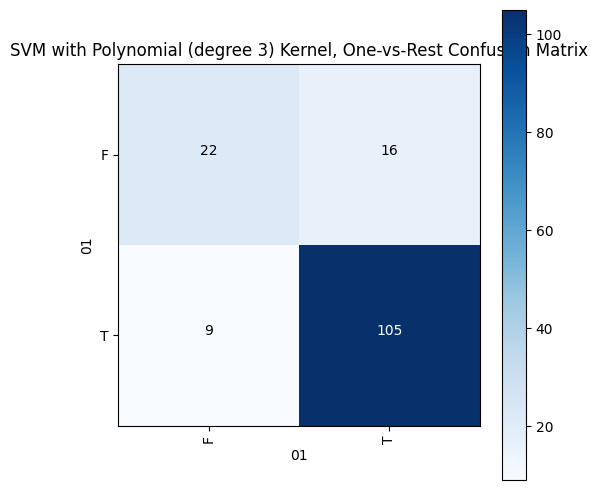

In [62]:
from sklearn import svm

def my_SVM(x_train_new, y_train, x_test_new, y_test, x, y):
    X = x_train_new
    y = y_train

    # class_weight=None
    class_weight='balanced'

    models = (svm.SVC(kernel='linear', decision_function_shape='ovr', class_weight=class_weight),
            svm.SVC(kernel='linear', decision_function_shape='ovo', class_weight=class_weight),
            svm.SVC(kernel='rbf',class_weight=class_weight, decision_function_shape='ovr'),
            svm.SVC(kernel='poly',class_weight=class_weight, degree=3, decision_function_shape='ovr')
            )
    models_fit = (clf.fit(x_train_new, y_train) for clf in models)

    # title for the plots
    titles = ('SVM with linear Kernel, One-vs-Rest',
            'SVM with linear Kernel, One-VS-One',
            'SVM with RBF Kernel, One-vs-Rest',
            'SVM with Polynomial (degree 3) Kernel, One-vs-Rest')



    scores = []
    for clf, title in zip(models_fit, titles):
        scores.append(clf.score(x_test_new, y_test))


    print("||============================================================================||")
    print("||----------------------------------------------------------------------------||")
    print('|| Accuracy of SVM with linear Kernel, One-vs-Rest:=> {:.2f} %'.format(scores[0]*100), "               ||")
    print("||----------------------------------------------------------------------------||")
    print('|| Accuracy of SVM with linear Kernel, One-vs-One:=> {:.2f} %'.format(scores[1]*100), "                ||")
    print("|| ---------------------------------------------------------------------------||")
    print('|| Accuracy of SVM with RBF Kernel, One-vs-Rest:=> {:.2f} %'.format(scores[2]*100), "                  ||")
    print("||----------------------------------------------------------------------------||")
    print('|| Accuracy of SVM with polynomial (degree 3) Kernel, One-vs-Rest:=> {:.2f} %'.format(scores[3]*100), "||")
    print("||============================================================================||")
    print("||----------------------------------------------------------------------------||")

    models_fit_mat = (clf.fit(x_train_new, y_train) for clf in models)

    plt.style.use('default')
    for title, clf in zip(titles, models_fit_mat):
        y_pred = clf.predict(x_test_new)
        confusion_mtx = confusion_matrix(y_test, y_pred)
        plot_confusion_matrix(confusion_mtx, "FT", title=title+" Confusion Matrix")

my_SVM(x_train_new, y_train, x_test_new, y_test, x, y)


/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:269: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.

/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:269: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.

/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:269: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.

/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:269: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.

/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:269: FutureWarning:


||====================================================||
--------------------------------------------------------
||====================================================||
|| Test Accuracy Decision Tree Model :=> 78.29%  ||
||====================================================||
--------------------------------------------------------
--------------------------------------------------------
||====================================================||
|| Binary Cross Entropy - Decision Tree Model :=> 7.83  ||
||====================================================||
--------------------------------------------------------
--------------------------------------------------------
||====================================================||
|| Cross Entropy Accuracy :=> 71.04% +- 4.60%  ||
||====================================================||
--------------------------------------------------------
              precision    recall  f1-score   support

           F       0.57      0.55      0.56

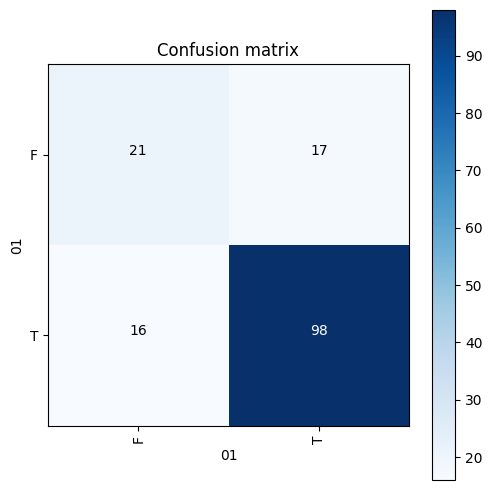

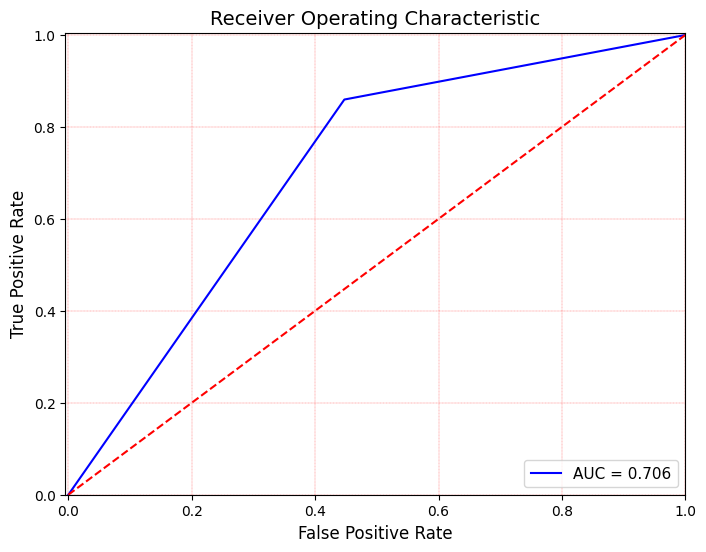

In [65]:
from sklearn import tree

def my_Tree(x_train_new, y_train, x_test_new, y_test, x, y):
    clf = tree.DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=None, min_samples_split=2, 
                                    min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', 
                                    max_leaf_nodes=None, min_impurity_decrease=0.0, 
                                    class_weight='balanced', ccp_alpha=0.0)
    clf.fit(x_train_new, y_train)
    y_pred = clf.predict(x_test_new)
    y_pred_train = clf.predict(x_train_new)
    
    print("||====================================================||")
    print("--------------------------------------------------------")
    print("||====================================================||")
    print("|| Test Accuracy Decision Tree Model :=> %.2f%%" % (accuracy_score(y_test, y_pred)*100), " ||")
    print("||====================================================||")
    print("--------------------------------------------------------")
    print("--------------------------------------------------------")
    print("||====================================================||")
    print("|| Binary Cross Entropy - Decision Tree Model :=> {:.2f}".format(log_loss(y_test, y_pred)), " ||")
    print("||====================================================||")
    print("--------------------------------------------------------")
    acc = cross_val_score(clf, x, y, cv=5, scoring='accuracy')
    print("--------------------------------------------------------")
    print("||====================================================||")
    print("|| Cross Entropy Accuracy :=> %.2f%% +- %.2f%%" %(np.mean(acc)*100, np.std(acc)*100), " ||")
    print("||====================================================||")
    print("--------------------------------------------------------")
    confusion_mtx = confusion_matrix(y_test, y_pred)
    print(classification_report(y_test, y_pred, target_names="FT"))
    plot_confusion_matrix(confusion_mtx, "FT")
    # method I: plt
    plot_roc_curve(y_test, y_pred)

my_Tree(x_train_new, y_train, x_test_new, y_test, x, y)
